## Bisection method for the reciprocal

One way to compute $1/d$ to double precision is to use bisection.  Note that we are going to assume that $d > 0$.

In [1]:
function reciprocal_bisect(d)
    hi = 1
    lo = 0
    for k = 1:63
        x = (hi+lo)/2
        fx = d*x-1
        if fx > 0
            hi = x
        else
            lo = x
        end
    end
    return (hi+lo)/2
end

reciprocal_bisect (generic function with 1 method)

In [2]:
reciprocal_bisect(10)

0.1

## Binary long division

An alternate implementation is binary long division, the same algorithm that you were probably taught in elementary school (except in binary).

In [3]:
function reciprocal_divide(d)
    r = 1     # Current remainder
    x = 0     # Current reciprocal estimate
    bit = 0.5 # Value of a one in the current place
    for k = 1:63
        if r > d*bit
            x = x +   bit
            r = r - d*bit
        end
        bit = bit/2;
    end
    return x
end

reciprocal_divide (generic function with 1 method)

In [4]:
reciprocal_divide(10)

0.1

## Rates of convergence

Bisection and binary long division both have a linear rate of convergence.  The Newton iteration converges quadratically -- but only when the starting point is close enough to the correct answer.

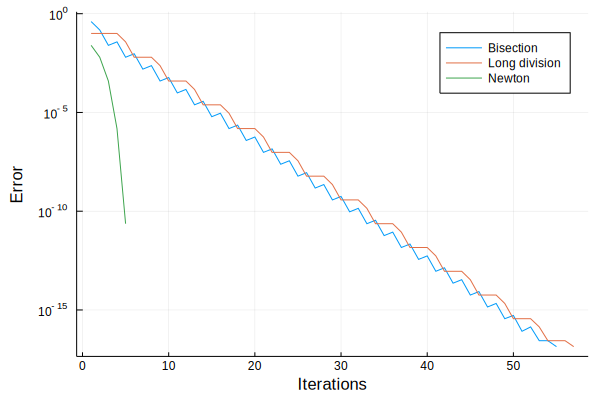

In [5]:
using Plots
d = 10

hi = 1
lo = 0
bisect_errs = zeros(63)
for k = 1:63
    x = (hi+lo)/2
    bisect_errs[k] = 1/d-x
    fx = d*x-1
    if fx > 0
        hi = x
    else
        lo = x
    end
end

r = 1     # Current remainder
x = 0     # Current reciprocal estimate
bit = 0.5 # Value of a one in the current place
long_errs = zeros(63)
for k = 1:63
    long_errs[k] = 1/d-x
    if r > d*bit
        x = x +   bit
        r = r - d*bit
    end
    bit = bit/2
end

x = 0.125
newton_errs = zeros(63)
for k = 1:63
    newton_errs[k] = 1/d-x
    x = x*(2-d*x)
end

plot(abs.(bisect_errs[bisect_errs .!= 0]), yaxis=:log, label="Bisection", ylabel="Error", xlabel="Iterations")
plot!(abs.(long_errs[long_errs .!= 0]), yaxis=:log, label="Long division")
plot!(abs.(newton_errs[newton_errs .!= 0]), yaxis=:log, label="Newton")